In [4]:
from matplotlib import pyplot as plt
from tqdm   import tqdm_notebook as tqdm

In [5]:
from radioreader import *
from methods import *
from kittler import kittler_float

In [14]:
directory = '101nvss_fit'
ext = 'fit'
names = glob.glob('{0}/*.{1}*'.format(directory, ext))
images = []
for n in tqdm(range(len(names))):
    im = readImg(names[n], normalize=True, sz=64)
    k = kittler_float(im, copy=False)
    images.append(k)
    del im
    del k
print("Number of images", len(images))


Number of images 101


In [51]:
coords = []
for im in images:
    im_coords = []
    for i in range(len(im)):
        row = im[i]
        for j in range(len(row)):
            im_coords.append([i,j,im[i,j]])
    coords.append(np.array(im_coords))
coords = np.array(coords)

In [52]:
coords.shape

(101, 4096, 3)

In [25]:
import numpy as np
import ot
import ot.plot

In [48]:
n = 50  # nb samples

mu_s = np.array([0, 0])
cov_s = np.array([[1, 0], [0, 1]])

mu_t = np.array([4, 4])
cov_t = np.array([[1, -.8], [-.8, 1]])

xs = ot.datasets.make_2D_samples_gauss(n, mu_s, cov_s)
xt = ot.datasets.make_2D_samples_gauss(n, mu_t, cov_t)

a, b = np.ones((n,)) / n, np.ones((n,)) / n  # uniform distribution on samples

# loss matrix
M = ot.dist(xs, xt)
M /= M.max()

Text(0.5, 1.0, 'Cost matrix M')

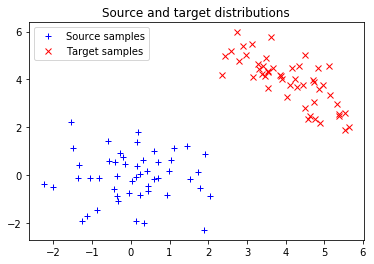

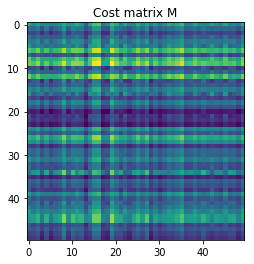

In [49]:
pl.figure(1)
pl.plot(xs[:, 0], xs[:, 1], '+b', label='Source samples')
pl.plot(xt[:, 0], xt[:, 1], 'xr', label='Target samples')
pl.legend(loc=0)
pl.title('Source and target distributions')

pl.figure(2)
pl.imshow(M, interpolation='nearest')
pl.title('Cost matrix M')

In [44]:
b

array([0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02])

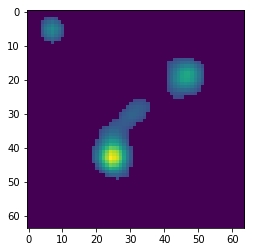

In [97]:
plt.imshow(images[10])
plt.show()

In [110]:
%%time

M = ot.dist(coords[0], coords[0])
G = ot.emd2(a=[],b=[],M=M)

CPU times: user 2.29 s, sys: 741 ms, total: 3.03 s
Wall time: 2.19 s


In [111]:
G

8.715250743307479e-15